In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from utils import utility
from utils.encoder import OneHotEncoder, ThermometerEncoder, IntegerEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('credit-g_csv.csv')
df = df.dropna()
len(df[df['class']=='good']), len(df[df['class']=='bad'])

(700, 300)

In [3]:
nominal_features = ['credit_history', 'purpose', 'personal_status', 'other_parties', 'other_payment_plans', 'own_telephone', 'foreign_worker']
ordinal_features = ['checking_status', 'savings_status', 'employment', 'property_magnitude', 'housing', 'job']

label = ['class']
other_features = list(set(df.columns) - (set(nominal_features + ordinal_features + label)))

ordinal_features_plus = ['checking_status']
ordinal_features_plus = ordinal_features
# # ordinal_features = ['savings_status', 'employment', 'housing']
# ordinal_features = ['checking_status', 'property_magnitude', 'job']

In [4]:
unique_dic = utility.df_to_dict(df)
other_dic = {k: unique_dic[k] for k in other_features}
nominal_dic = {k: unique_dic[k] for k in nominal_features}
label_dic = {k: unique_dic[k] for k in label}
ordinal_dic = {
    'checking_status': ['no checking', '<0', '0<=X<200', '>=200'],
    'savings_status': ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000',],
    'employment': ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],
    'property_magnitude': ['no known property', 'life insurance', 'car', 'real estate'],
    'housing': ['for free', 'rent', 'own'],
    'job': ['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt']
}
ordinal_dic_plus = {key: ordinal_dic[key] for key in ordinal_features_plus}


In [5]:
# import random
# from sklearn.model_selection import KFold
# k=10
# regr = LogisticRegression(max_iter=1000)
# test_pred_res, test_true_res = [], []
# train_pred_res, train_true_res = [], []
# sc = StandardScaler()
# kf = KFold(k)   
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for train_index, test_index in kf.split(df):
#     X_train, y_train, X_test, y_test = X.iloc[train_index], pd.DataFrame(y.iloc[train_index]), X.iloc[test_index], pd.DataFrame(y.iloc[test_index])
#     # random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], ThermometerEncoder, ordinal_dic_plus)
#     nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], OneHotEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], ThermometerEncoder, ordinal_dic)
#     other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     sc.fit(other_train)
#     other_train, other_test = sc.transform(other_train), sc.transform(other_test)
#     y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     # X_train_all, X_test_all = ordinal_train, ordinal_test
#     X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred_test = regr.predict(X_test_all)
#     y_pred_train = regr.predict(X_train_all)
#     test_true_res = test_true_res+ [np.squeeze(y_test)] if len(test_true_res)> 0 else [np.squeeze(y_test)]
#     test_pred_res = test_pred_res+ [np.squeeze(y_pred_test)] if len(test_pred_res)> 0 else [np.squeeze(y_pred_test)]
#     train_true_res = train_true_res+ [np.squeeze(y_train)] if len(train_true_res)> 0 else [np.squeeze(y_train)]
#     train_pred_res = train_pred_res+ [np.squeeze(y_pred_train)] if len(train_pred_res)> 0 else [np.squeeze(y_pred_train)]

# test_temp_res, train_temp_res = [], []
# for i in range(k):
#     test_temp_res.append(classification_report(test_true_res[i], test_pred_res[i], output_dict=True)) 
#     train_temp_res.append(classification_report(train_true_res[i], train_pred_res[i], output_dict=True)) 
# clf_rep_dic_test, clf_rep_dic_train = utility.concat_dic(*test_temp_res), utility.concat_dic(*train_temp_res)
# test_res, train_res = utility.mean_std_dic(clf_rep_dic_test), utility.mean_std_dic(clf_rep_dic_train)

In [6]:
# train_res['accuracy'], test_res['accuracy']

In [7]:
# import random
# k=10
# test_size = 0.25
# sc = StandardScaler()
# regr = LogisticRegression(max_iter=1000)
# temp_pred_res, temp_true_res = np.array([]), np.array([])
# random.seed(0)
# for _ in range(k):
#     X_train, y_train, X_test, y_test = utility.split_dataset(df, test_size, random)
#     #to test whether adding subset of ordinal features with different encodings(thermometer or one-hot) imporves performance 
#     random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], OneHotEncoder, ordinal_dic_plus)
#     nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], IntegerEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], IntegerEncoder, ordinal_dic)
#     other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     sc.fit(other_train)
#     other_train, other_test = sc.transform(other_train), sc.transform(other_test)
    
#     # to test whether adding repeated features improves performance
#     # t=1
#     # random_train, random_test = [nominal_train for _ in range(t)], [nominal_test for _ in range(t)]
#     X_train_all, X_test_all = np.concatenate([other_train, nominal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, random_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred = regr.predict(X_test_all)
#     temp_true_res = np.concatenate([temp_true_res, y_test]) if temp_true_res.size > 0 else y_test
#     temp_pred_res = np.concatenate([temp_pred_res, y_pred]) if temp_pred_res.size > 0 else y_pred


# clf_rep_dic = classification_report(temp_true_res, temp_pred_res, output_dict=True)
     

In [11]:
res, models = utility.k_fold_validation(k=10, 
                  df=df, 
                  encoders=[OneHotEncoder, IntegerEncoder, ThermometerEncoder],  
                  pred_task=
                    {
                      'name': 'classification',
                      'model': XGBClassifier(),
                      'metric': {'clf_rep': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)}
                    }, 
                  features=
                    {
                      'ordinal': {
                        'name': ordinal_features,
                        'dict': ordinal_dic
                      },
                      'nominal': {
                        'name': nominal_features,
                        'dict': nominal_dic
                      },
                      'numerical': other_features,
                      'label': label_dic
                    },
                    return_model=True)

c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vect

In [ ]:
k=10
spec_dic = {key: [] for key in ordinal_dic.keys()}
for i in range(k):
    ohe_1 = models['OneHotEncoder'][i]
    te_1 = models['ThermometerEncoder'][i]
    ie_1 = models['IntegerEncoder'][i]

    other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

    nom_coef_dic = utility.create_coef_dic(other_num, nominal_dic, ohe_1.coef_,te_1.coef_, ie_1.coef_)
    ord_coef_dic = utility.create_coef_dic(other_num+nom_num, ordinal_dic, ohe_1.coef_,te_1.coef_)
    ord_coef_dic_cum = {key: [val[0]]+[np.cumsum(val[1])] for key, val in ord_coef_dic.items()}
    for key, val in ord_coef_dic_cum.items():
        spec_dic[key] += [np.corrcoef(val)[0][1]]
spec_dic_mean_std = {key : (np.mean(val), np.std(val)) for key, val in spec_dic.items()}

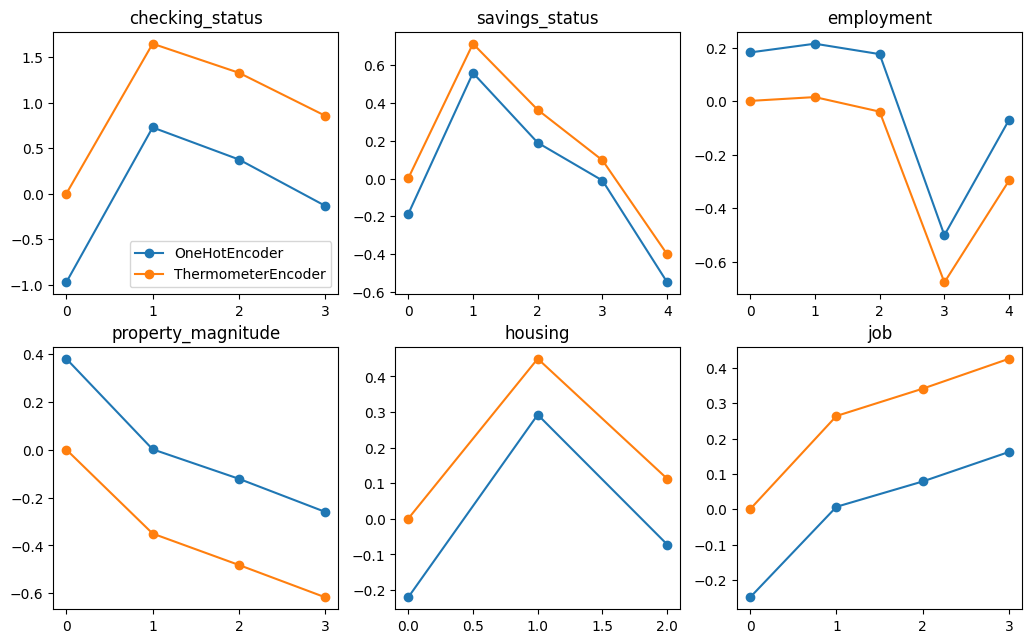

In [ ]:
import matplotlib.pyplot as plt
label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']
keys_name = list(spec_dic_mean_std.keys())
fig, ax = plt.subplots(2, 3, figsize=(12.5,7.5))
ax = ax.ravel()
for i, (key, val) in enumerate(ord_coef_dic_cum.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), val[j], label = label[j], marker='o')
        ax[i].set_title(keys_name[i])
        
ax[0].legend()       


In [ ]:
import matplotlib.pyplot as plt

label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']

fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,20))
fig.suptitle('ordinal')
for i, (key, val) in enumerate(ord_coef_dic_cum.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), val[j], label = label[j])
ax[0].legend()       

# fig, ax = plt.subplots(len(nom_coef_dic.keys()), 1, figsize=(5,10))
# fig.suptitle('nominal')
# for i, (key, val) in enumerate(nom_coef_dic.items()):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]), label = label[j])

# fig = plt.figure(figsize=(5,3))
# fig.suptitle('other')
# plt.plot(range(len(ohe_1.coef_[0][:other_num])), ohe_1.coef_[0][:other_num])
# plt.plot(range(len(te_1.coef_[0][:other_num])), te_1.coef_[0][:other_num])
# plt.plot(range(len(ie_1.coef_[0][:other_num])), ie_1.coef_[0][:other_num])

In [12]:
def encoding(X_train, encoder, dic, step_sizes=None):
    cat_encoder = encoder(dic, step_sizes) 
    return utility.concat(cat_encoder(X_train))

k=10
kf = KFold(k) 
class_index = 0 #idx 0 for class 1, idx 1 for class 2
chosen_class = label_dic['class'][class_index]
sc = StandardScaler()
result_dic = {}
for feature, unique_val in ordinal_dic.items():
    feature_pred_prob = {}
    for encoder in [OneHotEncoder, ThermometerEncoder, IntegerEncoder]:
        temp_df = df.copy()
        levels_pred_prob_mean = []
        levels_pred_prob_std = []
        for val in unique_val:
            temp_df[feature] = temp_df[feature].map(lambda x: val)
            models_pred_prob_mean = []
            for i, (_, test_index) in enumerate(kf.split(df)):
                chosen_df = temp_df.iloc[test_index] 
                chosen_df = chosen_df[chosen_df['class'] == chosen_class]
                chosen_df = chosen_df.iloc[:, :-1]
                model = models[encoder.__str__()][i]
                X_nominal = encoding(chosen_df[nominal_features], OneHotEncoder, nominal_dic)
                X_ordinal = encoding(chosen_df[ordinal_features], encoder, ordinal_dic)
                X_other = sc.fit_transform(np.array(chosen_df[other_features].values))
                X_all = np.concatenate([X_other, X_nominal, X_ordinal], axis=1)
                pred_prob = model.predict_proba(X_all)[:, class_index]
                models_pred_prob_mean.append(np.mean(pred_prob))
            levels_pred_prob_mean.append(np.mean(models_pred_prob_mean))
            levels_pred_prob_std.append(np.std(models_pred_prob_mean))
        feature_pred_prob[encoder.__str__()] = [levels_pred_prob_mean]+[levels_pred_prob_std]
    result_dic[feature] = feature_pred_prob    
                
    

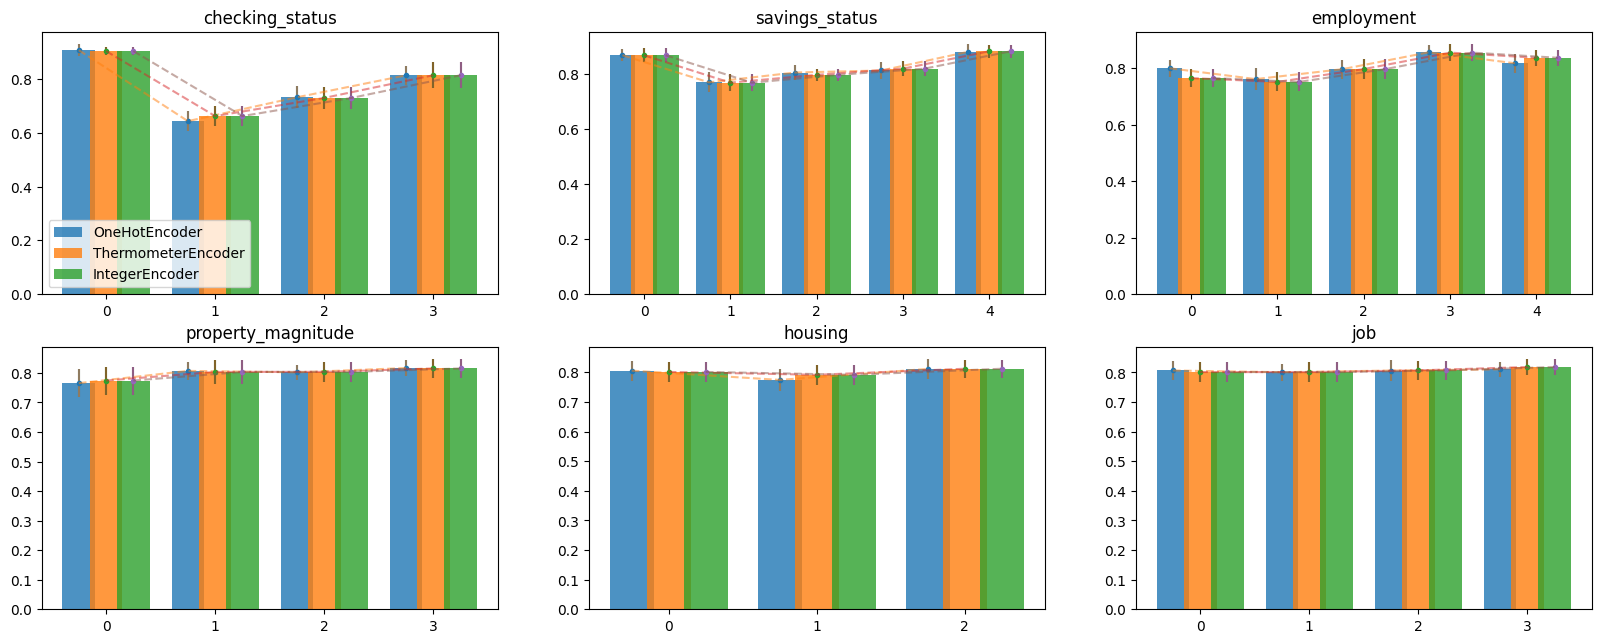

In [13]:
import matplotlib.pyplot as plt
label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']
x_axis_placement = [-0.25, 0, 0.25]
fig, ax = plt.subplots(2,3, figsize=(20,7.5))
ax = ax.ravel()
for i, (key, val) in enumerate(ordinal_dic.items()):
    for j, enc_name in enumerate(label):
        ax[i].bar(np.array(range(len(val)))+x_axis_placement[j], result_dic[key][enc_name][0], label = enc_name, alpha = 0.8, width=0.3)
        ax[i].errorbar(np.array(range(len(val)))+x_axis_placement[j], result_dic[key][enc_name][0], result_dic[key][enc_name][1], alpha = 1, fmt='.')
        ax[i].errorbar(np.array(range(len(val)))+x_axis_placement[j], result_dic[key][enc_name][0], result_dic[key][enc_name][1], alpha = 0.5, fmt='--')
        ax[i].set_title(key)
        ax[i].set_xticks(range(len(val)))

        
ax[0].legend() 
plt.savefig('credit-g-result\credit-g_csv_xgb_pred_prob.png')

In [60]:
pd.DataFrame(clf_rep_dic).to_csv('credit-g_csv_k_10_wo_ord.csv')

In [11]:
import math
def round_decimal_places(df, d):
    dec = math.pow(10,d)
    df_copy = df.copy()
    df_copy = df_copy.map(lambda x: (math.ceil(x[0]*dec)/dec, math.ceil(x[1]*dec)/dec))
    return df_copy

In [12]:
res_copy = res.copy()
d = 7
for encoder in res.keys():
    res_copy[encoder]['clf_rep']['accuracy'] = {key: res[encoder]['clf_rep']['accuracy'] for key in res[encoder]['clf_rep']['macro avg'].keys()}
# df_lists = [pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns") for key in res_copy.keys()]
df_lists = [utility.round_decimal_places(pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns").drop(index='support'), d) for key in res_copy.keys()]

In [63]:
df_lists[0]

OneHotEncoder,1.0,2.0,accuracy,macro avg,weighted avg
precision,"(0.791, 0.051)","(0.607, 0.126)","(0.747, 0.053)","(0.699, 0.071)","(0.74, 0.056)"
recall,"(0.869, 0.048)","(0.466, 0.096)","(0.747, 0.053)","(0.667, 0.059)","(0.747, 0.053)"
f1-score,"(0.827, 0.039)","(0.522, 0.096)","(0.747, 0.053)","(0.675, 0.063)","(0.737, 0.056)"


In [13]:
with open('credit-g-result\credit-g_csv_xgb.csv','w') as f:
    for df in df_lists:
        f.write(f"{df.columns.name}\n")
        df.to_csv(f)
        f.write("\n")

In [74]:
# def stringify(dicc, name, categorical=True):
#     dic = dicc.copy()
#     for key, val in dic.items():
#         if categorical: 
#             dic[key] = ['\n'.join([str(v) for v in val]), name]
#         else: 
#             dic[key] = [' '.join([str(v) for v in val]), name]
#     return dic
# dic = {**stringify(other_dic, 'numerical',False), **stringify(nominal_dic, 'nominal'), **stringify(ordinal_dic, 'ordinal')}
# dic_df = pd.DataFrame(dic, index=['attribute values', 'data type'])
# dic_df.T.to_csv('atrr_spec_credit-g.csv')
# dic_df.T.to_excel('atrr_spec_credit-g.xlsx')

In [ ]:
# import matplotlib.pyplot as plt

# wnum = ['w num ohe', 'w num te', 'w num ie']
# wonum = ['wo num ohe', 'wo num te', 'wo num ie']

# fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,10))
# fig.suptitle('ordinal')
# for i, (val, val_2) in enumerate(zip(ord_coef_dic.values(), ord_coef_dic_2.values())):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]), label = wnum[j])
#         ax[i].plot(range(len(val_2[j])), np.abs(val_2[j]), label = wonum[j])
# ax[0].legend()

# fig, ax = plt.subplots(len(nom_coef_dic.keys()), 1, figsize=(5,20))
# fig.suptitle('nominal')
# for i, (val, val_2) in enumerate(zip(nom_coef_dic.values(), nom_coef_dic_2.values())):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]), label = wnum[j])
#         ax[i].plot(range(len(val_2[j])), np.abs(val_2[j]), label = wonum[j])
# ax[0].legend()

# fig = plt.figure(figsize=(5,3))
# fig.suptitle('other')
# plt.plot(range(len(ohe_1.coef_[0][:other_num])), ohe_1.coef_[0][:other_num])
# plt.plot(range(len(te_1.coef_[0][:other_num])), te_1.coef_[0][:other_num])
# plt.plot(range(len(ie_1.coef_[0][:other_num])), ie_1.coef_[0][:other_num])

In [17]:
# pd.DataFrame(
#     {
#         'UCI German Credit':{
#             'number of instances':1000,
#             'number of features': 21,
#             'number of ordinal features': 6,
#             'prediction task': 'classification'
#         },
#         'Wisconsin Breast Cancer':{
#             'number of instances':699,
#             'number of features': 10,
#             'number of ordinal features': 10,
#             'prediction task': 'classification'
#         },
#         'Default of Credit Clients':{
#             'number of instances':30000,
#             'number of features': 24,
#             'number of ordinal features': 7,
#             'prediction task': 'classification'
#         },
#         "Adult's income":{
#             'number of instances':195665,
#             'number of features': 10,
#             'number of ordinal features': 4,
#             'prediction task': 'regression'
#         }
#     }
# ).to_csv('dataset_characteristic.csv')